In [98]:
import PIL
from PIL import Image 
import numpy as np

sprt = "C:/Users/Baris/Documents/PixelArt/FloatCycleSPRITE_outline.png" #sprite
shd  = "C:/Users/Baris/Documents/PixelArt/FloatCycleSPRITE_shade.png" #shade
txtr = "C:/Users/Baris/Documents/PixelArt/NFT_textureMask.png" #34x26 (x3 frames sprite sheet)
f,r,l = "Front", "Right", "Left"
crop_crd  = {"Front":(9, 0, 25, 26), "Right":(16,0,34,26), "Left":(0,0,18,26)}
directions  = [f,f,f,r,r,r,r,f,f,f,f,l,l,l,l]
coordinates = []

GIF_WIDTH  = 32
GIF_HEIGHT = 32

In [99]:
im = Image.open("C:/Users/Baris/Documents/PixelArt/NFT_sprite.png")
dat = [i for i in Image.Image.getdata(im) ]
w,h,c = im.size[0], im.size[1], len(dat[0])#widht, height, color dimensions
SHmat = np.array(dat).reshape(h,w,c)

In [100]:
sprite_frames = {"Front" : {"matrix":[], "nonBgIndices": [], "pixels" : [], "img": None},
          "Left"  : {"matrix":[], "nonBgIndices": [], "pixels" : [], "img": None},
          "Right" : {"matrix":[], "nonBgIndices": [], "pixels" : [], "img": None}}

bg_frames = []
final_frames = []

In [101]:
def getNonBGIndices(FrameMatrix, color2ignore = (255,0,0)):
    # color2ignore is the background color
    indices = [] #(row, column)
    for ind in range(len(FrameMatrix)):
        pxl = FrameMatrix[ind]
        if (pxl[0] != color2ignore[0] or pxl[1] != color2ignore[1] or pxl[2] != color2ignore[2]):
            indices.append(ind)
    return indices


def convert2im(matrix, width, height):
    new_im = Image.new("RGBA",(width,height))
    new_im.putdata(matrix)
    return new_im


def decreasebrightness(pxl, shade):
    r,g,b = pxl[0],pxl[1],pxl[2]
    r0,g0,b0 = shade[0],shade[1],shade[2]
    r1,g1,b1 = int(max(0, r*(r0/255))),int(max(0, b*(b0/255))),int(max(0, g*(g0/255)))
    return (r1,b1,g1,255)


def split2sections(img, sliceWidth):
    #Requires the slices to cover the full height of the sprite sheet
    outputMatrixArray = []
    dat = [i for i in Image.Image.getdata(img) ]
    print(len(dat))
    w,h,c = img.size[0], img.size[1], len(dat[0])#widht, height, color dimensions
    
    numSlices = int(w/sliceWidth)
    for slice_ind in range(numSlices):
        new_slice = []
        for i in range(int(h)):
            start = int((i*w) + (sliceWidth * slice_ind))
            for j in range(int(sliceWidth)):
                new_slice.append(dat[start+j])
        outputMatrixArray.append(new_slice)
    return outputMatrixArray


def map2mat(frame_dict,texture_matrix):
    data = []
    data_matrix=[(0,0,0,0) for i in range(len(frame_dict['matrix']))]
    #np.array([(0,0,0,0) for i in range(texture_matrix.shape[1] * texture_matrix.shape[0])]).reshape(texture_matrix.shape[0], texture_matrix.shape[1], 4)
    for i in frame_dict['nonBgIndices']:
        data_matrix[i] = decreasebrightness(texture_matrix[i], frame_dict['matrix'][i])
#     new_im = Image.new("RGBA",(texture_matrix.shape[1], texture_matrix.shape[0]))
#     new_im.putdata(data)
    new_im = convert2im(data_matrix,frame_dict['w'],frame_dict['h'])
    #{"matrix":[], "nonBgIndices": [], "pixels" : [], "img": None}
    return new_im

def imgAndMat(img_addr):
    img = Image.open(img_addr)
    dat = [i for i in Image.Image.getdata(img) ]
    mat = dat
    return img, mat
    
def overlap(og,lyr,coord):
    return og.paste(lyr,coord,lyr)


def main(sprt:str, txtr:str, bg_sprt:str, coordinates:list, out_img: str, frames=15):
    sprite_frames = {"Front" : {"matrix":[], "nonBgIndices": [], "pixels" : [], "img": None, 'w':0, 'h':0},
          "Left"  : {"matrix":[], "nonBgIndices": [], "pixels" : [], "img": None, 'w':0, 'h':0},
          "Right" : {"matrix":[], "nonBgIndices": [], "pixels" : [], "img": None, 'w':0, 'h':0}}
    bg_frames = []
    texture_frames = []
    final_frames = []
    
    ims,sprite_mat = imgAndMat(sprt)
    imt,texture_mat = imgAndMat(txtr)
    imbg,bg_mat  = imgAndMat(bg_sprt)

    sects = split2sections(imbg, GIF_WIDTH)#(sprite_mat, imbg.size[0]/GIF_WIDTH)
    
    for i in sects:
        bg_frames.append(convert2im(i,GIF_WIDTH,imbg.size[1]))

    sects = split2sections(ims, ims.size[0]/3)
    print(sects[1] == sects[2])
    sprite_frames["Front"]["matrix"]  = sects[0]
    sprite_frames["Left"]["matrix"]   = sects[1]
    sprite_frames["Right"]["matrix"]  = sects[2]
    sprite_frames["Front"]["w"],sprite_frames["Front"]["h"] = int(ims.size[0]/3), ims.size[1] 
    sprite_frames["Left"]["w"],sprite_frames["Left"]["h"] = int(ims.size[0]/3), ims.size[1] 
    sprite_frames["Right"]["w"],sprite_frames["Right"]["h"] = int(ims.size[0]/3), ims.size[1] 
    
    #{"matrix":[], "nonBgIndices": [], "pixels" : [], "img": None}
    for key in sprite_frames:
        sprite_frames[key]["nonBgIndices"] = getNonBGIndices(sprite_frames[key]["matrix"])
        sprite_frames[key]["img"] = map2mat(sprite_frames[key],texture_mat).crop(crop_crd[key])
        
        #"pixels" : []
    #"img":
    return sprite_frames

In [102]:
sprt = "C:/Users/Baris/Documents/PixelArt/NFT_sprite.png" #sprite
shd  = "C:/Users/Baris/Documents/PixelArt/FloatCycleSPRITE_shade.png" #shade
txtr = "C:/Users/Baris/Documents/PixelArt/txtrtest.png"
x = main(sprt,txtr,sprt, [], sprt)

2652
2652
False


In [95]:
34*26 *3

2652

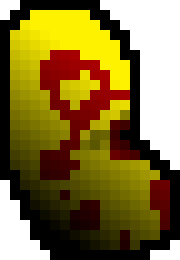

In [103]:
m = x["Left"]["img"].crop((x1,0,x2,26))
m.resize((m.size[0]*10,m.size[1]*10),Image.NEAREST)

In [96]:
im = Image.open(shd)
dat = [i for i in Image.Image.getdata(im) ]
w,h,c = im.size[1], im.size[0], len(dat[0])#widht, height, color dimensions
datmat = np.array(dat).reshape(h,w,c)

In [46]:
color = [52, 137, 235, 255]

In [91]:
new_im = Image.new("RGB",(32,32))
new_im.putdata(all_pixels)
#new_im.save("test.jpg")

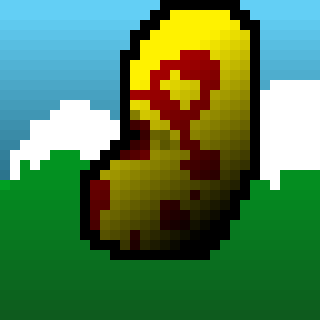

In [111]:
bgr = "C:/Users/Baris/Documents/PixelArt/nft_bgtest.png"
bg = Image.open(bgr)
m = x["Right"]["img"]
bg.paste(m,[8,0],m)
bg.resize((320,320), Image.NEAREST)

In [128]:
imgs = []
gifname = 'C:/users/baris/desktop/GIFout.gif'
coords = [[8,0],
         [9,0],
         [9,1],
         [9,2],
         [9,3],
         [8,3],
         [8,3],
         [7,3],
         [7,2],
         [7,1],
         [7,0],
         [8,0]] 
im = Image.new("RGB",(320,320))
for coord in coords:
    bg = Image.open(bgr)
    m = x["Right"]["img"]
    bg.paste(m,coord,m)
    f = bg.resize((320,320), Image.NEAREST)
    imgs.append(f)
im.save(gifname, save_all=True, append_images=imgs, loop=0, filter = Image.NEAREST)


In [130]:
im.show()